<a href="https://colab.research.google.com/github/amitav710/BNNusingMCMC/blob/main/BNNusingMCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [62]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import math

Generating our Noisy XOR Dataset

In [63]:
x1_train=np.random.random(5000)
x2_train=np.random.random(5000)
x1_test=np.random.random(1000)
x2_test=np.random.random(1000)

In [64]:
y_train=[]
for i in range(5000):
  if((x1_train[i]>0.5 and x2_train[i]>0.5) or (x1_train[i]<0.5 and x2_train[i]<0.5)):
    y_train.append(0)
  else:
    y_train.append(1)

In [65]:
y_train=np.array(y_train)

In [66]:
type(y_train)

numpy.ndarray

In [67]:
len(y_train)

5000

In [68]:
y_test=[]
for i in range(1000):
  if((x1_test[i]>0.5 and x2_test[i]>0.5) or (x1_test[i]<0.5 and x2_test[i]<0.5)):
    y_test.append(0)
  else:
    y_test.append(1)

In [69]:
y_test=np.array(y_test)

In [70]:
len(y_test)

1000

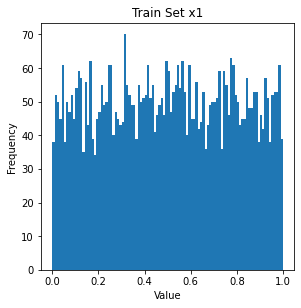

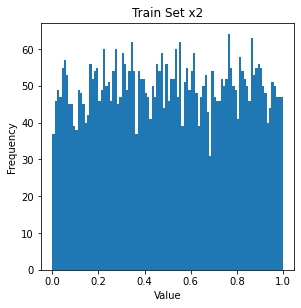

In [71]:
fig1=plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(2,2,2)
ax1.hist(x1_train,bins=100)
ax1.set_xlabel("Value")
ax1.set_ylabel("Frequency")
ax1.set_title("Train Set x1")
x1_mean=x1_train.mean()
fig2=plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(2,2,2)
ax2.hist(x2_train,bins=100)
ax2.set_xlabel("Value")
ax2.set_ylabel("Frequency")
ax2.set_title("Train Set x2")
x2_mean=x2_train.mean()

In [72]:
x1_train.shape

(5000,)

In [73]:
x1_train=x1_train.reshape(5000,1)

In [74]:
x1_train

array([[0.26432586],
       [0.42670662],
       [0.48905485],
       ...,
       [0.13044729],
       [0.51696216],
       [0.2552442 ]])

In [75]:
x2_train=x2_train.reshape(5000,1)

In [76]:
x2_train

array([[0.39822135],
       [0.88591048],
       [0.61143113],
       ...,
       [0.43746507],
       [0.84320073],
       [0.65686015]])

In [77]:
train_set = np.concatenate((x1_train,x2_train), axis=1)

In [78]:
train_set

array([[0.26432586, 0.39822135],
       [0.42670662, 0.88591048],
       [0.48905485, 0.61143113],
       ...,
       [0.13044729, 0.43746507],
       [0.51696216, 0.84320073],
       [0.2552442 , 0.65686015]])

In [79]:
train_set.shape

(5000, 2)

In [80]:
type(train_set)

numpy.ndarray

In [81]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=25)

Defining Important Functions

In [82]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [83]:
def prior(theta, mu=0, sigma=1):
  theta=np.array(theta)
  p=0
  for t in theta:
    p+=np.sum(-(t**2)/2)
  return p

In [84]:
def log_likelihood(y:np.ndarray,y_pred:np.ndarray):
  y_pred = y_pred.squeeze()
  #print(np.sum(-np.log(0.5 * np.sqrt(2* np.pi) )-((y-y_pred)**2)))
  return np.sum(-np.log(0.5 * np.sqrt(2* np.pi) )-((y-y_pred)**2))

In [85]:
def likelihood(y:np.ndarray,y_pred:np.ndarray):
  return np.exp(log_likelihood(y,y_pred))

In [86]:
def Q(theta_n):
  W=[]
  for w in theta_n:
    W.append(np.random.normal(loc=w,size=w.shape))
  return W

Creating our Functional Model

In [87]:
class BNN():
  def __init__(self):
    self.theta=[np.random.randn(2,4), np.random.randn(1,4), np.random.randn(4,1), np.random.randn(1,1)]
  def __call__(self, x:np.ndarray, wts):
    x=x@wts[0]+wts[1]
    x=sigmoid(x)
    x=x@wts[2]+wts[3]
    x=sigmoid(x)
    return x

In [88]:
network = BNN()

In [89]:
def MetropolisHasting(training_data,training_labels,epoch):
  accepted_set=[]
  x,y = training_data,training_labels
  w=network.theta
  for i in range(epoch):
    # print(w)
    w_dash=Q(w)
    # print(w_dash)
    y_pred=network(x,w)
    #print(y_pred)
    y_dash_pred=network(x,w_dash)
    w_dash_likelihood = log_likelihood(y,y_dash_pred)
    w_likelihood = log_likelihood(y,y_pred)
    w_dash_prior=prior(w)
    w_prior=prior(w)
    ratio=(w_dash_likelihood+w_dash_prior)-(w_likelihood+w_prior)

    print(ratio)
    if (ratio>=0):
      w=w_dash
      accepted_set.append(w_dash)
    else:
      k=np.random.binomial(1,math.exp(ratio))
      if(k):
        w=w_dash
        accepted_set.append(w_dash)
  return accepted_set

In [90]:
accepted=MetropolisHasting(train_set,y_train,30000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Streaming output truncated to the last 5000 lines.
-702.3958213082433
-336.2602463190824
-464.3630917348787
-217.4583944956139
-964.3792447255946
-858.7656348001042
-213.2305911235435
-320.00047844727897
-1028.9874566642002
-103.91063497566029
-117.48445371501566
-384.7515221574131
-626.9642116643745
-203.03790411107275
-523.2344487419145
-327.6804577982807
-457.97647211438834
-738.1187140157799
-1168.353073106714
-98.79998751338144
-129.1225749557293
-750.4794648124321
-451.7592664252329
-572.9545228570441
-746.27779620823
-1254.4750905552537
-316.66917659922274
-412.8990093228804
-597.7441914601241
-468.94376107778635
-952.9653617252147
-700.151201729197
-1044.069744347049
-416.4596724749322
-1050.4730479286422
-144.942090834003
-145.59625504779024
-257.9560747665605
-940.1848830843514
-644.9431131080728
-256.80785249427845
-2023.659470143431
-549.2312851408697
-256.1809552255181
-576.8680209625882
-327.71319603976735
-837.4740568691604
-743.0557863423755
-310.79851027642644
-218.508

In [91]:
len(accepted)

38

In [92]:
x1_test=x1_test.reshape(1000,1)

In [93]:
x2_test=x2_test.reshape(1000,1)

In [94]:
x_test = np.concatenate((x1_test,x2_test), axis=1)

In [95]:
x_test

array([[0.90766198, 0.51422456],
       [0.26311376, 0.55231108],
       [0.87191261, 0.58171746],
       ...,
       [0.27302519, 0.64894416],
       [0.96702446, 0.43203815],
       [0.07079906, 0.69025964]])

In [97]:
x_test.shape

(1000, 2)

In [98]:
type(x_test)

numpy.ndarray

In [99]:
correct=0
for (x,y) in zip(x_test,y_test):
  y_pred=0
  for theta in accepted:
    output = network(x,theta)
    y_pred+=output.item()
  y_hat=y_pred/len(accepted)
  if y_hat<0.5:
    y_hat=0
  else:
    y_hat=1
  if y_hat==y:
    correct+=1

In [100]:
y_test.shape

(1000,)

In [101]:
accuracy = correct/len(y_test)
print(accuracy)

0.918
